<a href="https://colab.research.google.com/github/a1ire3a/SpatialFilter-Laplacian-UnSharpMasking/blob/main/Image_Proc_Spatial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Spatial Filters***

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from numpy.core.fromnumeric import shape

In [ ]:
def spatial_filter(img, filter, padding):
    h, w, c = img.shape
    result = np.zeros(shape=(h,w,c))

    zeropadImage = np.ones(shape=(h+2,w+2,c))
    zeropadImage = zeropadImage * padding

    for i in range(c):
       for j in range(h):
            for k in range(w):
                zeropadImage[j+1][k+1][i] = img[j][k][i]
    for i in range(c):
        for j in range(h):
            for k in range(w):
                result[j][k][i] = (filter[0][0] * zeropadImage[j][k][i] + filter[0][1] * zeropadImage[j][k+1][i] + filter[0][2] * zeropadImage[j][k+2][i] +
                                   filter[1][0] * zeropadImage[j+1][k][i] + filter[1][1] * zeropadImage[j+1][k+1][i] + filter[1][2] * zeropadImage[j+1][k+2][i] + 
                                   filter[2][0] * zeropadImage[j+2][k][i] + filter[2][1] *  zeropadImage[j+2][k+1][i] + filter[2][2] * zeropadImage[j+2][k+2][i])
    return result

# ***Laplacian:***

In [ ]:
image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Fig0338(a)(blurry_moon).jpg', cv2.IMREAD_ANYCOLOR)
filterLaplacian = [[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1]]

In [ ]:
image3dim = image1[:, :, np.newaxis]
conv2d = spatial_filter(image3dim, filterLaplacian, 0)
enhanc = image3dim + conv2d
enhance2dim = enhanc[:,:,0]
conv2d2dim = conv2d[:,:,0]

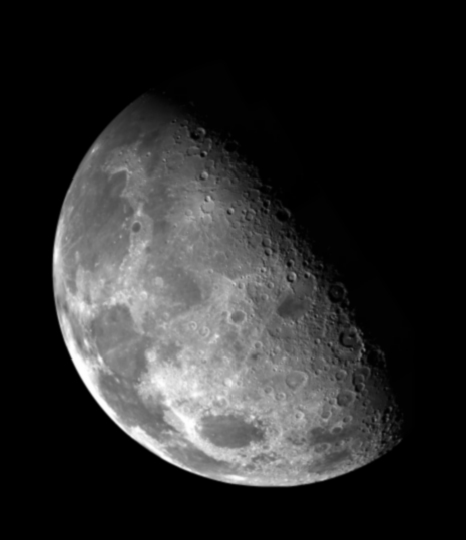

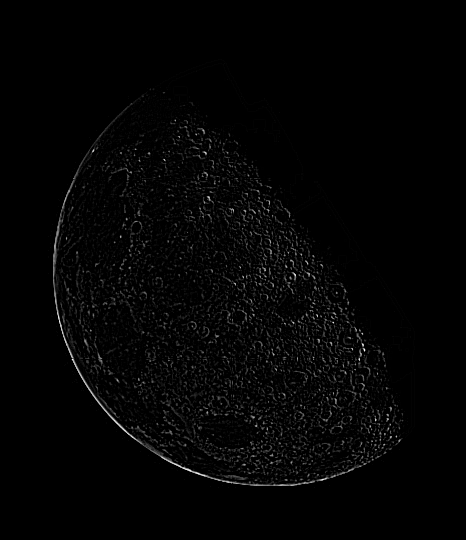

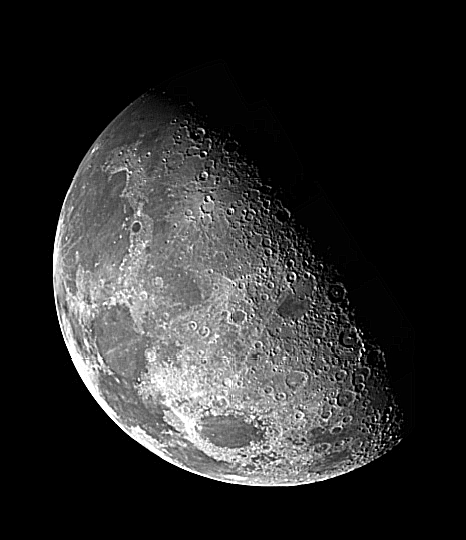

In [ ]:
cv2_imshow(image1)
cv2_imshow(conv2d2dim)
cv2_imshow(enhance2dim)

# ***Un-sharp masking:***
***high-boost filtering***

In [ ]:
image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Fig0340(a)(dipxe_text).jpg', cv2.IMREAD_ANYCOLOR)
filterBoosted = [[1, 1, 1],
                 [1, 1, 1],
                 [1, 1, 1]]

In [ ]:
image3dim = image2[:, :, np.newaxis]
conv2d = spatial_filter(image3dim, filterBoosted,255)
gmask = image3dim - (1/9) * conv2d
g = image3dim + 4.5 * gmask
enhance2dim = g[:,:,0]
conv2d2dim = conv2d[:,:,0]

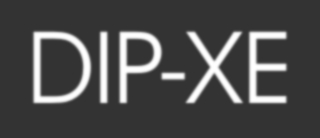

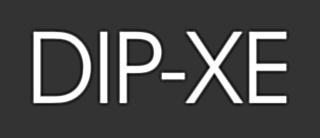

In [ ]:
cv2_imshow(image2)
cv2_imshow(enhance2dim)